In [13]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)


In [14]:
wine.data.shape

(178, 13)

In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
import seaborn as sns
#from fitter import Fitter, get_common_distributions, get_distributions
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('fivethirtyeight')

wine = load_wine()

features, labels = wine.data, wine.target
data_df = pd.DataFrame(wine.data, columns=wine.feature_names)
data_df['target'] = wine.target
data_df.shape

(178, 14)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[-- -- -- -- -- -- -- -- -- -- -- -- --]
 [0.0949302569607553 -- -- -- -- -- -- -- -- -- -- -- --]
 [0.21273976364322336 0.1649722803203419 -- -- -- -- -- -- -- -- -- -- --]
 [-0.3119878777774754 0.29013034858217573 0.44587208591136357 -- -- -- --
  -- -- -- -- -- --]
 [0.272328159391206 -0.054883429960182036 0.2882058251070906
  -0.08380389697794133 -- -- -- -- -- -- -- -- --]
 [0.29073446226309213 -0.3370605960160884 0.12970823560691788
  -0.3229

<Figure size 1000x1000 with 0 Axes>

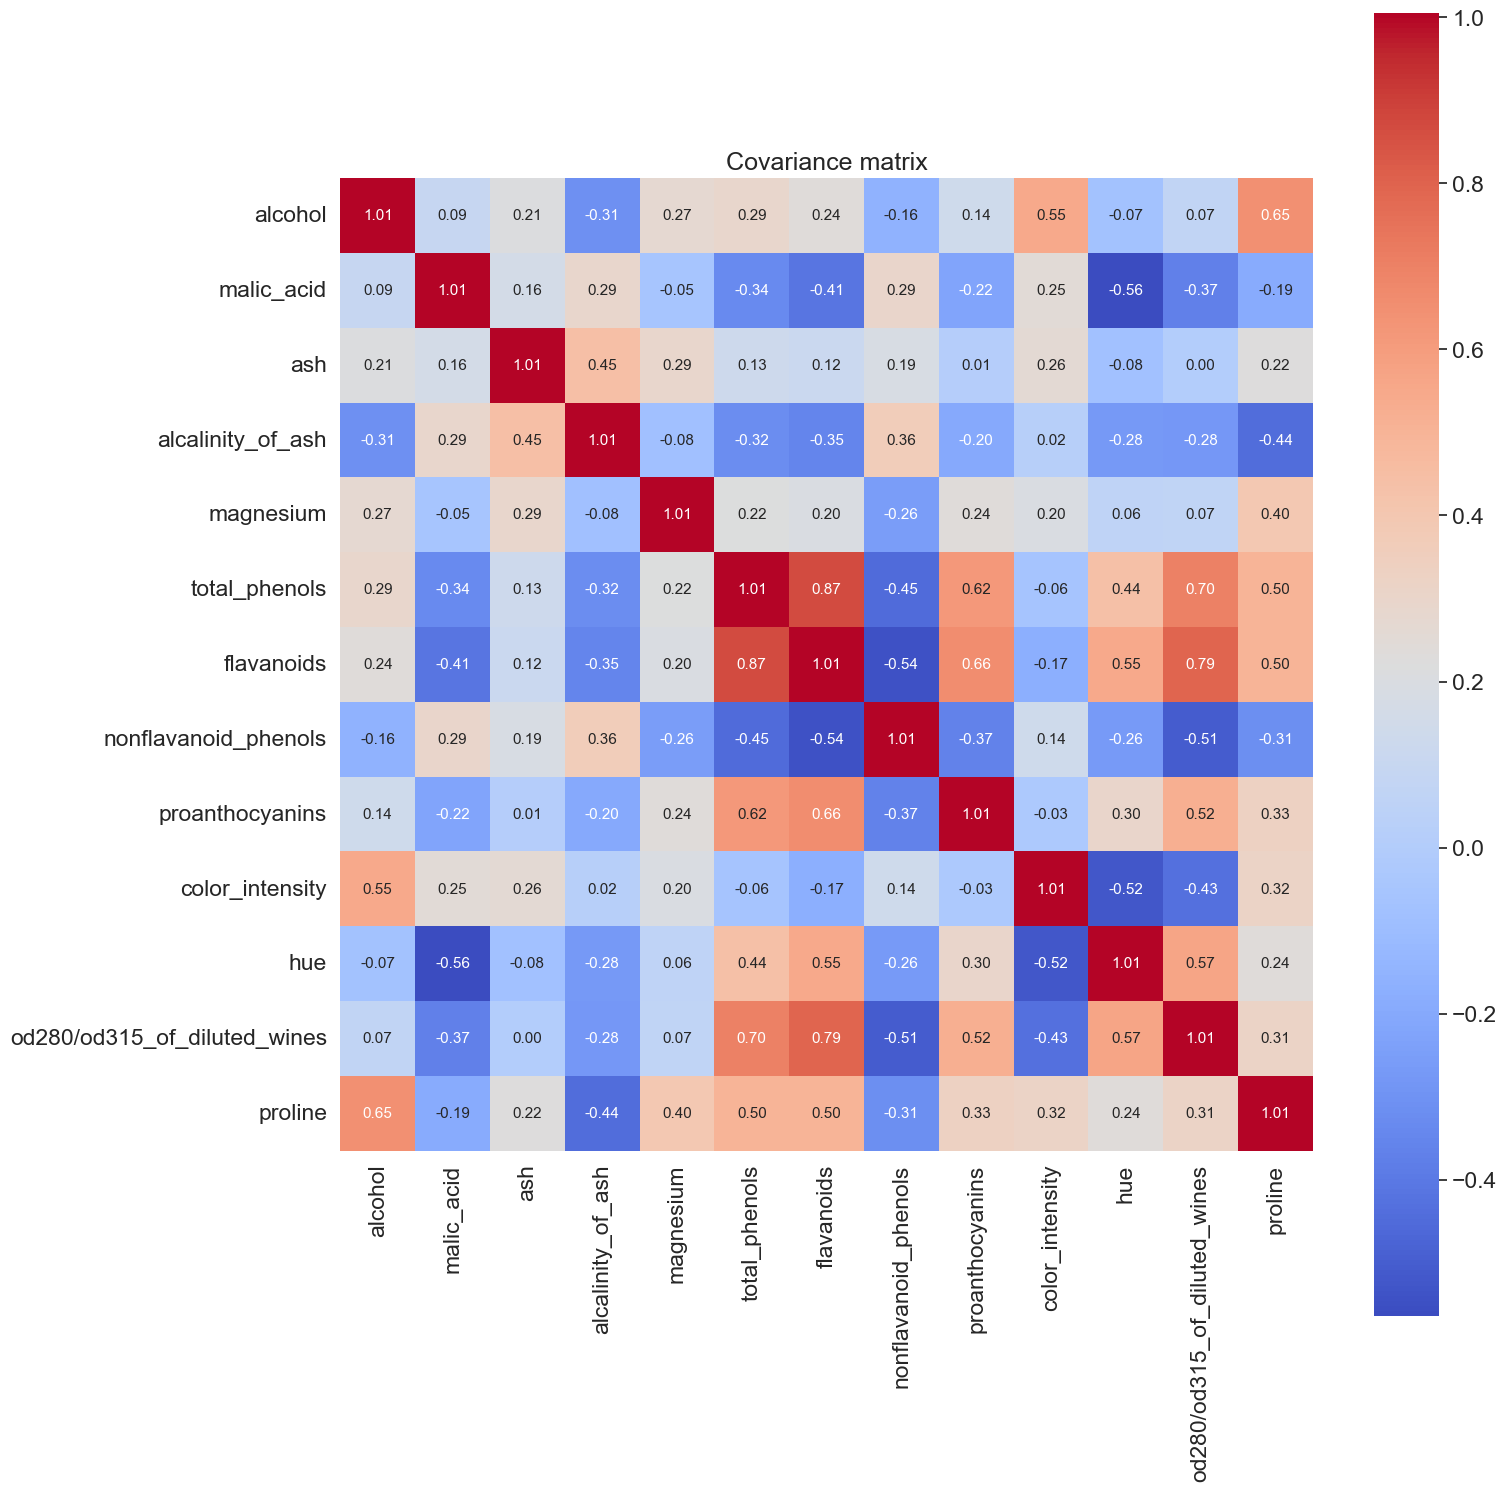

In [22]:
stdsc = StandardScaler() 
feature_cols = data_df[wine.feature_names]

X_std = stdsc.fit_transform(feature_cols.values)

cov_mat =np.cov(X_std.T)
# cov_mat[cov_mat>0.99]=None

# remove the diagonal and upper triangle from cov_mat  
mask = np.zeros_like(cov_mat)
mask[np.triu_indices_from(mask)] = True
print(mask)
cov_mat = np.ma.array(cov_mat, mask=mask)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.figure(figsize=[16,16])
hm = sns.heatmap(cov_mat,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 11},cmap='coolwarm',                 yticklabels=wine['feature_names'],xticklabels=wine['feature_names'])
cur_cid_df = pd.DataFrame(cov_mat,index=wine['feature_names'],columns=wine['feature_names'])
plt.title('Covariance matrix', size = 18)
plt.tight_layout()
plt.show()